!pip install tensorflow keras

# Tensorflow & Keras
Machine Learning & AI

# Part 1: Examples of Neural Network Construction

## Keras

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import keras as k

Using TensorFlow backend.


In [105]:
from tensorflow.compat import v1 as tf
tf.compat.v1.disable_eager_execution()

In [59]:
k.__version__, tf.keras.__version__

('2.3.1', '2.2.4-tf')

## Example: Convolutional Neural Network

Trains a simple convnet on the MNIST dataset.

* Gets to 99.25% test accuracy after 12 epochs without any tuning
* c. 15s/epoch good GPU, c. 60s / epoch good CPU

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [8]:
K.image_data_format()

'channels_last'

In [9]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


### Building the Network

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2595 - accuracy: 0.9193 - val_loss: 0.0577 - val_accuracy: 0.9806


In [21]:
x_test[0, :, :, 0].shape

(28, 28)

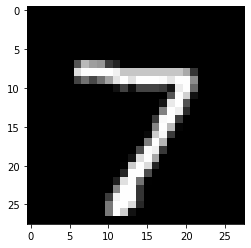

In [24]:
import matplotlib.pyplot  as plt
plt.imshow(x_test[0, :, :, 0], cmap='gray')
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.057704174415627495
Test accuracy: 0.9805999994277954
